In [1]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])

In [2]:
df.head()

,t
0,0
1,1
2,2
3,3
4,4


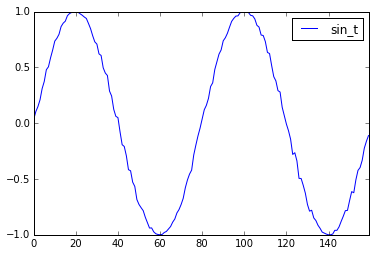

In [3]:
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [5]:
df.shape

(4001, 2)

In [6]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)

In [7]:
length_of_sequences = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev =length_of_sequences)  

In [10]:
y_train.shape

(3501, 1)

In [11]:
a,b = _load_data(df)

In [12]:
a.shape

(3901, 100, 2)

In [13]:
b.shape

(3901, 2)

In [16]:
a1=np.array([df.iloc[1:10].as_matrix()])

In [18]:
a1

array([[[ 1.        ,  0.10414606],
        [ 2.        ,  0.14858456],
        [ 3.        ,  0.20993759],
        [ 4.        ,  0.31008909],
        [ 5.        ,  0.37388333],
        [ 6.        ,  0.47909093],
        [ 7.        ,  0.50562824],
        [ 8.        ,  0.5858903 ],
        [ 9.        ,  0.65576582]]])

In [19]:
df.shift?